# Import Libraries

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import csv
from matplotlib.colors import LogNorm
import glob
import os
import sys

## Reading the file from the save

In [180]:
# File path
# dat_file = "/home/kartav/scratch/scattering/po_2/save/proc_0_spec_1_step_20000.dat"
dat_file = "/home/kartav/scratch/shock_Gamma_20/save/proc_0_spec_1_step_16000.dat"
# dat_file = "/media/kk/ac140ca2-6543-496e-8b32-44ebee8af5f3/storage/scratch/scattering_frequency_runs/proc_0_spec_2_step_15000_nu_1.dat"

# Skip the first two rows and read the 18-column data starting from the third row
df = pd.read_csv(dat_file, delimiter=r'\s+', skiprows=2, header=None)

# Ensure the data has 18 columns
if df.shape[1] != 19:
    raise ValueError("Expected 18 columns, but got a different number. Check the file structure.")

# Rename columns (optional)
df.columns = [
    "px", "py", "pz", "x", "y", "omega", 
    "xp", "x_prev", "y_prev", "nu", 
    "px_prev", "py_prev", "pz_prev", "m", 
    "p0", "gamma", "q", "Ex", "track"
]

# Access specific columns by name or index
column_1 = df["px"].tolist()       # Access column by name (e.g., 'px')
column_2 = df["py"].tolist()        # Access column by name (e.g., 'y')

# Print or use the columns as needed
print("Column 1 (px):", column_1[:5])  # Print first 5 entries for Column 1
print("Column 2 (py):", column_2[:5])   # Print first 5 entries for Column 5

# File path
#dat_file = "/home/kartav/scratch/scattering/po_2/save/proc_1_spec_1_step_20000.dat"
dat_file = "/home/kartav/scratch/shock_Gamma_20/save/proc_1_spec_1_step_16000.dat"
#dat_file = "/media/kk/ac140ca2-6543-496e-8b32-44ebee8af5f3/storage/scratch/scattering_frequency_runs/proc_1_spec_2_step_15000_nu_1.dat"

# Skip the first two rows and read the 18-column data starting from the third row
df1 = pd.read_csv(dat_file, delimiter=r'\s+', skiprows=2, header=None)

# Ensure the data has 18 columns
if df1.shape[1] != 19:
    raise ValueError("Expected 18 columns, but got a different number. Check the file structure.")

# Rename columns (optional)
df1.columns = [
    "px1", "py1", "pz1", "x1", "y1", "omega1", 
    "xp1", "x_prev1", "y_prev1", "nu1", 
    "px_prev1", "py_prev1", "pz_prev1", "m1", 
    "p01", "gamma1", "q1", "Ex1", "track1"
]

Column 1 (px): [-0.53199, -0.92074, -0.56438, -0.211, -0.65297]
Column 2 (py): [-0.11352, -0.1891, -0.4799, -0.069442, -0.46191]


## Joining the variables from the two files

In [181]:
px = df["px"].tolist() + df1["px1"].tolist() # Momentum in X direction
py = df["py"].tolist() + df1["py1"].tolist()# Momentum in Y direction
pz = df["pz"].tolist() + df1["pz1"].tolist() # Momentum in Z direction
x = df["x"].tolist() + df1["x1"].tolist()# ??, List contains all entries 0 
y = df["y"].tolist() + df1["y1"].tolist()# ??, List contains all entries 0
omega = df["omega"].tolist() + df1["omega1"].tolist()# Plasma Frequency, List contains all entries 0
xp = df["xp"].tolist() + df1["xp1"].tolist() # Updated X momentum
x_prev = df["x_prev"].tolist() + df1["x_prev1"].tolist()# ??, List contains all entries 0
y_prev = df["y_prev"].tolist() + df1["y_prev1"].tolist()# ??, List contains all entries 0
nu = df["nu"].tolist() + df1["nu1"].tolist()# Pitch angle frequency
px_prev = df["px_prev"].tolist() + df1["px_prev1"].tolist() # x momentum previous array, used for pusher methods?
py_prev = df["py_prev"].tolist() + df1["py_prev1"].tolist()# y momentum previous array, used for pusher methods?
pz_prev = df["pz_prev"].tolist() + df1["pz_prev1"].tolist()# z momentum previous array, used for pusher methods?
m = df["m"].tolist() + df1["m1"].tolist()# Mass of the particle, constant = 1
p0 = df["p0"].tolist() + df1["p01"].tolist()# Energy sqrt (m^2c^4 + p_x^2 + p_y^2 + p_z^2)
gamma = df["gamma"].tolist() + df1["gamma1"].tolist() # Lorentz Factor
q = df["q"].tolist() # Charge
Ex = df["Ex"].tolist() # Electric field, electric field is zero in our case
track = df["track"].tolist() + df1["track1"].tolist()

## 2D Histograms

### $p_x$ Vs $x_p$ and $p_y$ Vs $x_p$ (in the turbulence/Weibel frame)

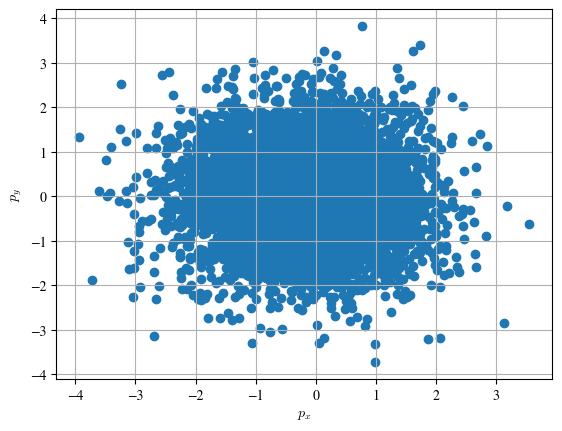

In [182]:
plt.grid()
plt.scatter(px,py)
plt.xlabel("$p_x$")
plt.ylabel('$p_y$')
#plt.title('n=50200, $\\nu=0.01$, Turbulence Frame, no lorentz boost')
plt.show()

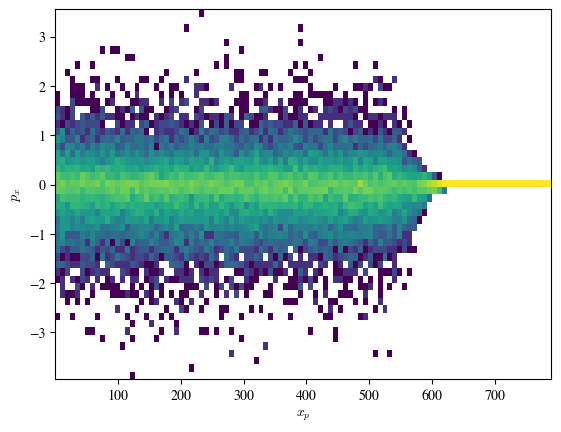

In [183]:
# P_x Vs X_p
plt.hist2d(xp, px, bins=[100,50], norm= LogNorm())
plt.ylabel("$p_x$")
plt.xlabel('$x_p$')
plt.show()

In [ ]:
# P_y Vs X_p
plt.hist2d(xp, py, bins=[100,50], norm= LogNorm())
plt.ylabel("$p_y$")
plt.xlabel('$x_p$')
plt.show()

### $P_0$ vs $x_p$

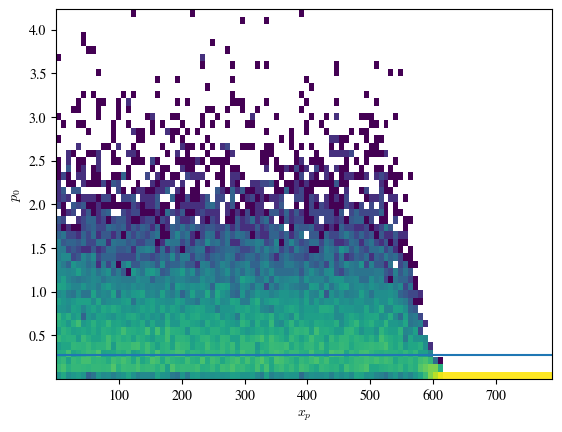

In [184]:
p=np.sqrt(np.array(px)**2 +np.array(py)**2)
plt.hist2d(xp, p, bins=[100,50], norm= LogNorm())
plt.axhline(0.125 * 4.358898943540675 * 0.5)
#plt.axhline(2)
plt.ylabel("$p_0$")
plt.xlabel('$x_p$')
#plt.ylim(0,5)
plt.show()

# Animations 
## (In the shock front frame)

In [185]:
# Joining the path to 'data' module present in the MASH pipeline for data analysis of the files saved in the diags

module_path = os.path.abspath(os.path.join('/home/kartav/MASH/data_analysis'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data import *

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

### Reading the binary files

In [186]:
# Reading the binary files stored in the diags folder

PATH = '/home/kartav/scratch/shock_Gamma_20/diags/'
g = data(PATH)
n = 16

d1 = g.read('charge','1',n)
Jx1 = g.read('Jx','1',n)/np.abs(d1)
Tyy1 = g.read('Tyy','1',n)/np.abs(d1)
bw1 = g.read('bw','1',n)/np.abs(d1)
Ex1 = g.read('Ex','1',n)/np.abs(d1)
x1 = g.read('x','1',1)

px1, px_xpar1, px_ypar1 = g.read2('px','1',n)
py1, py_xpar1, py_ypar1 = g.read2('py','1',n)
p01, p0_xpar1, p0_ypar1 = g.read2('p0','1',n)

print(d1.shape)

(16, 8020)


/tmp/ipykernel_11073/2980717348.py:8: RuntimeWarning: invalid value encountered in divide
  Jx1 = g.read('Jx','1',n)/np.abs(d1)
/tmp/ipykernel_11073/2980717348.py:9: RuntimeWarning: invalid value encountered in divide
  Tyy1 = g.read('Tyy','1',n)/np.abs(d1)
/tmp/ipykernel_11073/2980717348.py:10: RuntimeWarning: invalid value encountered in divide
  bw1 = g.read('bw','1',n)/np.abs(d1)
/tmp/ipykernel_11073/2980717348.py:11: RuntimeWarning: invalid value encountered in divide
  Ex1 = g.read('Ex','1',n)/np.abs(d1)


### Incorporating trapped and untrapped population in different lists

In [187]:
px1_t, px_xpar1_t, px_ypar1_t = g.read2('pxt','1',n)
py1_t, py_xpar1_t, py_ypar1_t = g.read2('pyt','1',n)
p01_t, p0_xpar1_t, p0_ypar1_t = g.read2('p0t','1',n)
kn1_t, kn_xpar1_t, kn_ypar1_t = g.read2('knt','1',n)

px1_u, px_xpar1_u, px_ypar1_u = g.read2('pxu','2',n)
py1_u, py_xpar1_u, py_ypar1_u = g.read2('pyu','2',n)
p01_u, p0_xpar1_u, p0_ypar1_u = g.read2('p0u','2',n)

In [188]:
# Check!!
print(py_ypar1_u)

[[100.           0.           0.        ]
 [100.          -0.2451874    0.2775004 ]
 [100.          -2.95525613   2.94296403]
 [100.          -3.39522931   3.60611114]
 [100.          -3.71770557   3.71333798]
 [100.          -3.71934291   3.71940343]
 [100.          -3.71941068   3.71940949]
 [100.          -4.373425     4.32599828]
 [100.          -5.18862385   5.19149913]
 [100.          -5.18862385   5.19747398]
 [100.          -5.19740976   5.19753203]
 [100.          -5.19748916   5.19753833]
 [100.          -5.19753314   5.19753833]
 [100.          -5.19753314   5.19753895]
 [100.          -5.19753314   5.19753895]
 [100.          -5.19753314   5.19753895]]


### Shock Profile: Momentum (all particles) vs Space 
(in the shok front frame)

/tmp/ipykernel_11073/2647477962.py:11: RuntimeWarning: divide by zero encountered in log10
  p1 = axs.imshow(np.log10(px1[it,:,:]),aspect='auto',cmap='jet',vmin=None,vmax=None,extent=[px_xpar1[it,1],px_xpar1[it,2],px_ypar1[it,1],px_ypar1[it,2]])


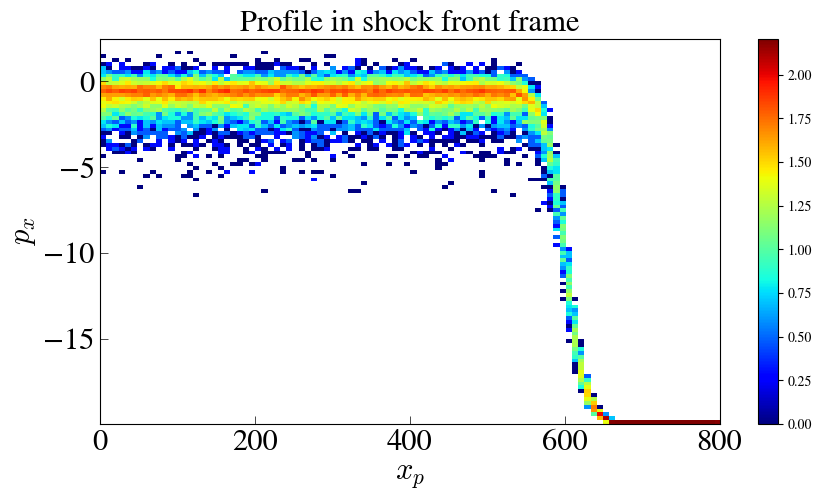

In [189]:
# Static plot generated for the last slice of the profile evolution

it = n-1

fig, axs = plt.subplots(1,1,figsize=(10, 5))
fslabel = 22
fslegend = 22
fstick = 22
fstxt = 22

p1 = axs.imshow(np.log10(px1[it,:,:]),aspect='auto',cmap='jet',vmin=None,vmax=None,extent=[px_xpar1[it,1],px_xpar1[it,2],px_ypar1[it,1],px_ypar1[it,2]])    
plt.colorbar(p1,ax=axs)
#axs.set_title(r'$\omega_{\rm i} t = %7.2f$ '%(Bz.TIME[0]/norm),fontsize=fslabel)
    #cbar = plt.colorbar()
#axs[0,0].set_xlabel(r'$x\,[c/\omega_{\rm p}]$',fontsize=fslabel)
#axs.set_ylabel(r'$y\,[c/\omega_{\rm p}]$',fontsize=fslabel)
axs.tick_params(which='major', direction='in', length=6, width=0.5, colors='k',
                           grid_color='r', grid_alpha=0.5, labelsize = fstick)
axs.tick_params(which='minor', direction='in', length=3, width=0.5, colors='k',
                           grid_color='r', grid_alpha=0.5)
# Set labels and title with consistent font sizes
axs.set_ylabel('$p_x$', fontsize=fslabel)
axs.set_xlabel('$x_p$', fontsize=fslabel)
axs.set_title('Profile in shock front frame', fontsize=fslabel)

# axs.set_ylim(0.,0.8)
# axs.set_ylim(-30,20)
# plt.axhline(-0.1)
plt.show()

### Shock Profile: Momentum Vs Space
#### Trapped Particles Vs Space
#### Untrapped Particles Vs Space

/tmp/ipykernel_11073/2293404662.py:11: RuntimeWarning: divide by zero encountered in log10
  p1 = axs.imshow(np.log10(px1_t[it,:,:]),aspect='auto',cmap='jet',vmin=None,vmax=None,extent=[px_xpar1_t[it,1],px_xpar1_t[it,2],px_ypar1_t[it,1],px_ypar1_t[it,2]])


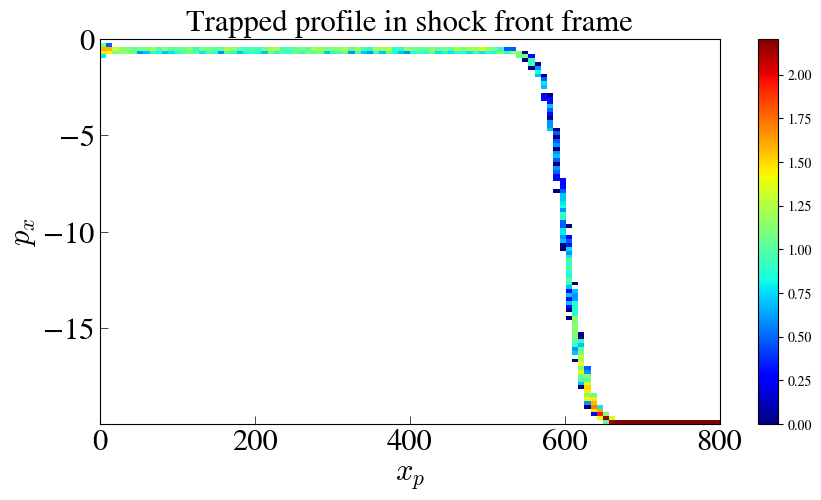

/tmp/ipykernel_11073/2293404662.py:41: RuntimeWarning: divide by zero encountered in log10
  p1 = axs.imshow(np.log10(px1_u[it,:,:]),aspect='auto',cmap='jet',vmin=None,vmax=None,extent=[px_xpar1_u[it,1],px_xpar1_u[it,2],px_ypar1_u[it,1],px_ypar1_u[it,2]])


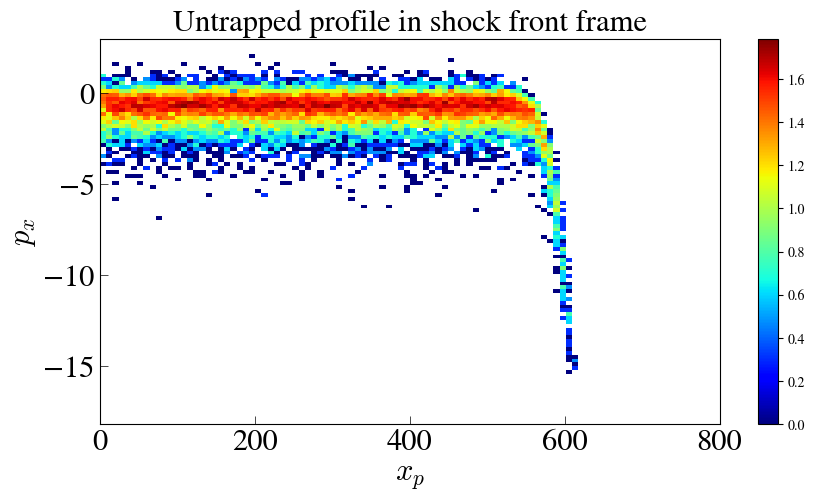

In [190]:
# Static plot generated for the last slice of the profile evolution

it = n-1

fig, axs = plt.subplots(1,1,figsize=(10, 5))
fslabel = 22
fslegend = 22
fstick = 22
fstxt = 22

p1 = axs.imshow(np.log10(px1_t[it,:,:]),aspect='auto',cmap='jet',vmin=None,vmax=None,extent=[px_xpar1_t[it,1],px_xpar1_t[it,2],px_ypar1_t[it,1],px_ypar1_t[it,2]])    
plt.colorbar(p1,ax=axs)
#axs.set_title(r'$\omega_{\rm i} t = %7.2f$ '%(Bz.TIME[0]/norm),fontsize=fslabel)
    #cbar = plt.colorbar()
#axs[0,0].set_xlabel(r'$x\,[c/\omega_{\rm p}]$',fontsize=fslabel)
#axs.set_ylabel(r'$y\,[c/\omega_{\rm p}]$',fontsize=fslabel)
axs.tick_params(which='major', direction='in', length=6, width=0.5, colors='k',
                           grid_color='r', grid_alpha=0.5, labelsize = fstick)
axs.tick_params(which='minor', direction='in', length=3, width=0.5, colors='k',
                           grid_color='r', grid_alpha=0.5)
# Set labels and title with consistent font sizes
axs.set_ylabel('$p_x$', fontsize=fslabel)
axs.set_xlabel('$x_p$', fontsize=fslabel)
axs.set_title('Trapped profile in shock front frame', fontsize=fslabel)

# axs.set_ylim(0.,0.8)
# axs.set_ylim(-30,20)
#plt.axhline(-0.1)
plt.show()

# Static plot generated for the last slice of the profile evolution

it = n-1

fig, axs = plt.subplots(1,1,figsize=(10, 5))
fslabel = 22
fslegend = 22
fstick = 22
fstxt = 22

p1 = axs.imshow(np.log10(px1_u[it,:,:]),aspect='auto',cmap='jet',vmin=None,vmax=None,extent=[px_xpar1_u[it,1],px_xpar1_u[it,2],px_ypar1_u[it,1],px_ypar1_u[it,2]])    
plt.colorbar(p1,ax=axs)
#axs.set_title(r'$\omega_{\rm i} t = %7.2f$ '%(Bz.TIME[0]/norm),fontsize=fslabel)
    #cbar = plt.colorbar()
#axs[0,0].set_xlabel(r'$x\,[c/\omega_{\rm p}]$',fontsize=fslabel)
#axs.set_ylabel(r'$y\,[c/\omega_{\rm p}]$',fontsize=fslabel)
axs.tick_params(which='major', direction='in', length=6, width=0.5, colors='k',
                           grid_color='r', grid_alpha=0.5, labelsize = fstick)
axs.tick_params(which='minor', direction='in', length=3, width=0.5, colors='k',
                           grid_color='r', grid_alpha=0.5)
# Set labels and title with consistent font sizes
axs.set_ylabel('$p_x$', fontsize=fslabel)
axs.set_xlabel('$x_p$', fontsize=fslabel)
axs.set_title('Untrapped profile in shock front frame', fontsize=fslabel)

# axs.set_ylim(0.,0.8)
# axs.set_ylim(-20,1)
#plt.axhline(-0.1)
plt.show()

In [ ]:

it = n-1
fig, axs = plt.subplots(1,1,figsize=(10, 5))
fslabel = 22
fslegend = 22
fstick = 22
fstxt = 22
pmin = kn_ypar1_t[it,2]
pmax = kn_ypar1_t[it,1]
print(pmin, pmax)
kn_av = np.linspace(pmin,pmax,100)
plt.plot(kn_av,np.mean(kn1_t[it,:,:50],axis=1))
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-3,1e2)
plt.show()

In [ ]:
print(px_xpar1_t) 
print(px_ypar1_t)

### Temperature in Shock front frame

In [ ]:
it = n-1
mi = 1
norm = 1
xmin = 0#(80000-(n+1)*500)/norm
xmax = 800#(80000)/norm
xpshock = 0
bs = 0

fig, axs = plt.subplots(1,1,figsize=(8, 4))
fslabel = 22
fslegend = 22
fstick = 17
fstxt = 22
norm = np.sqrt(mi)
for i in range(it,it+1):
    b1 = Jx1[i,:]  
    g1 = 1/np.sqrt(1-b1**2)
    T1 = Tyy1[i,:]
    axs.plot(x1[0,:]/norm,T1*g1/mi,'r',lw=1,alpha =1.)
    #axs.plot(x1[0,:]/norm,T1,'r',lw=1,alpha =1.)
#axs.set_yscale('log')
# axs.set_ylim(1e-12,1e-2)
axs.set_xlim(xmin/norm,xmax/norm)
axs.set_ylabel(r'$k_B T/m_{\rm e} c^2$',fontsize=fslabel)
axs.set_xlabel(r'$x\,[c/\omega_{\rm pi}]$',fontsize=fslabel)

axs.axhline(0.29,c='k',ls='-.')
axs.tick_params(which='major', direction='in', length=6, width=0.5, colors='k',
                           grid_color='r', grid_alpha=0.5, labelsize = fstick)
axs.tick_params(which='minor', direction='in', length=3, width=0.5, colors='k',
                           grid_color='r', grid_alpha=0.5)

plt.show()

In [ ]:
it = n-1
mi = 1
norm = 1
xmin = 0#(80000-(n+1)*500)/norm
xmax = 800#(80000)/norm
xpshock = 0
bs = 0

fig, axs = plt.subplots(1,1,figsize=(8, 4))
fslabel = 22
fslegend = 22
fstick = 17
fstxt = 22
norm = np.sqrt(mi)
for i in range(it,it+1):
    b1 = Jx1[i,:]  
    g1 = 1/np.sqrt(1-b1**2)
    T1 = Tyy1[i,:]
    #axs.plot(x1[0,:]/norm,T1*g1/mi,'r',lw=1,alpha =1.)
    axs.plot(x1[0,:]/norm,d1[i,:],'r',lw=1,alpha =1.)
#axs.set_yscale('log')
# axs.set_ylim(1e-12,1e-2)
axs.set_xlim(xmin/norm,xmax/norm)
axs.set_ylabel(r'Density',fontsize=fslabel)
axs.set_xlabel(r'$x\,[c/\omega_{\rm pi}]$',fontsize=fslabel)

axs.axhline(2,c='k',ls='-.')
axs.tick_params(which='major', direction='in', length=6, width=0.5, colors='k',
                           grid_color='r', grid_alpha=0.5, labelsize = fstick)
axs.tick_params(which='minor', direction='in', length=3, width=0.5, colors='k',
                           grid_color='r', grid_alpha=0.5)

plt.show()

In [ ]:
# Finally an animated .mp4 flies which will be directly saved on your working directory
# A static plot as above will be generated in the end if the execution of the run is succesful

import matplotlib.animation as animation

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Initial plot (first frame)
p1 = ax.imshow(np.log10(px1[0, :, :]), aspect='auto', cmap='jet', vmin=None, vmax=None, 
               extent=[px_xpar1[0, 1], px_xpar1[0, 2], px_ypar1[0, 1]-1, px_ypar1[0, 2]-1])
cbar = plt.colorbar(p1, ax=ax)

# Formatting to match your existing settings
fslabel = 22
fslegend = 22
fstick = 22
fstxt = 22
ax.tick_params(which='major', direction='in', length=6, width=0.5, colors='k',
               grid_color='r', grid_alpha=0.5, labelsize=fstick)
ax.tick_params(which='minor', direction='in', length=3, width=0.5, colors='k',
               grid_color='r', grid_alpha=0.5)

# Set labels and title with consistent font sizes
ax.set_ylabel('$p_x$', fontsize=fslabel)
ax.set_xlabel('$x_p$', fontsize=fslabel)
ax.set_title('Profile in shock front frame', fontsize=fslabel)
ax.set_ylim([-40,5])

# Update function for animation
def update(frame):
    # Update the data for the imshow plot
    p1.set_data(np.log10(px1[frame, :, :]))
    
    # Update the extent for each frame based on the current data
    p1.set_extent([px_xpar1[frame, 1], px_xpar1[frame, 2], px_ypar1[frame, 1]-1, px_ypar1[frame, 2]-1])

    # Dynamically adjust the color scale range (vmin, vmax) based on the data
    vmin = np.min(np.log10(px1[frame, :, :]))
    vmax = np.max(np.log10(px1[frame, :, :]))
    p1.set_clim(vmin, vmax)  # Adjust color scale dynamically
    
    return [p1]

# Create animation
ani = animation.FuncAnimation(fig, update, frames=n, interval=100, blit=False)

# Save as a video (optional)
ani.save("animation.mp4", writer="ffmpeg", dpi=150)

plt.show()

/tmp/ipykernel_11073/3189926124.py:9: RuntimeWarning: Mean of empty slice.
  temp_profile = [(np.array(py)**2 / np.array(p0))[bin_indices == i].mean()
/home/kartav/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_11073/3189926124.py:18: RuntimeWarning: Mean of empty slice.
  bulk_velocity = [(1 / np.sqrt(1 - beta[bin_indices == i]**2)).mean()
/tmp/ipykernel_11073/3189926124.py:22: RuntimeWarning: Mean of empty slice.
  particle_energy = [np.sqrt(np.array(px)[bin_indices == i]**2 +


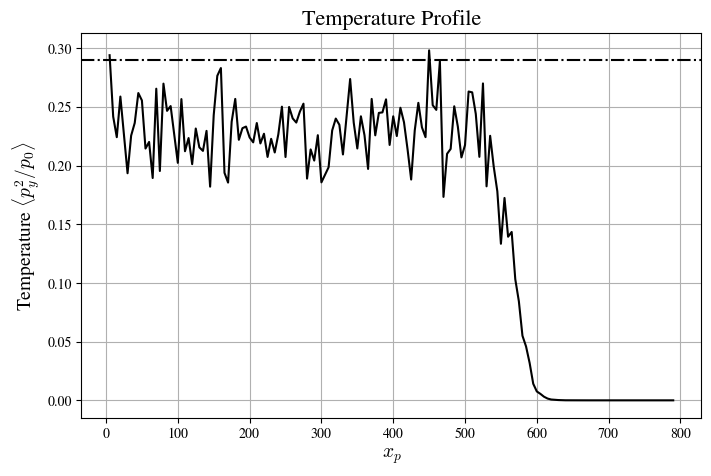

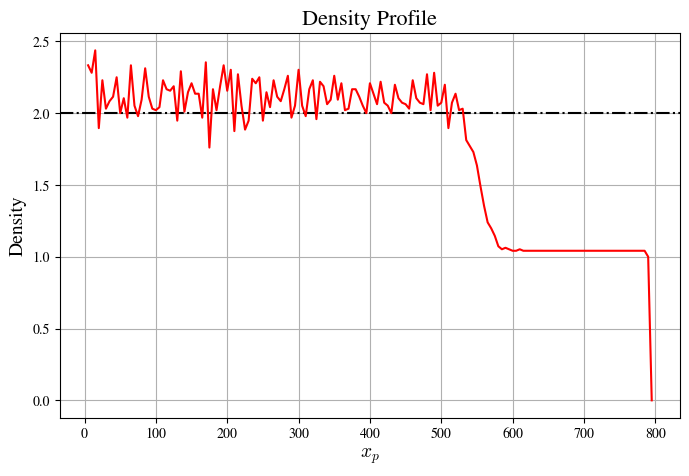

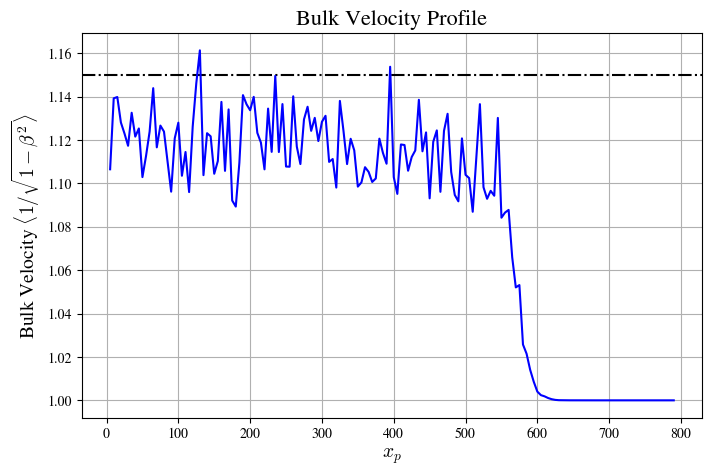

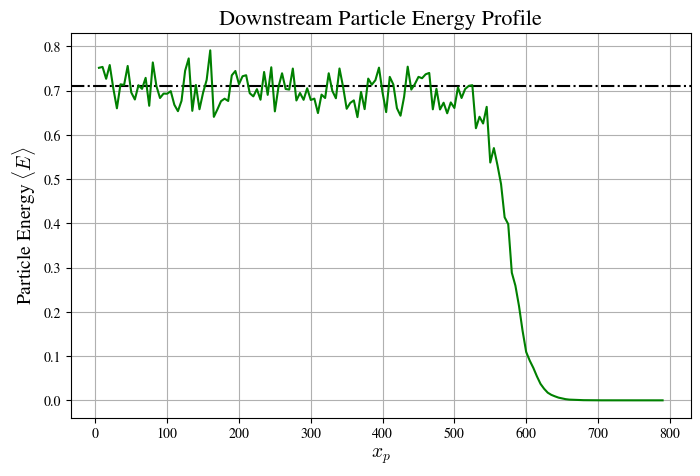

In [191]:
# Define bin size
Nbin = 5  # Bin size for averaging
bins = np.arange(0, 800, Nbin)

# Digitize particle positions into bins
bin_indices = np.digitize(np.array(xp), bins)

# Compute Temperature Profile <p_y^2 / p_0>
temp_profile = [(np.array(py)**2 / np.array(p0))[bin_indices == i].mean() 
                for i in range(1, len(bins))]

# Compute Density Profile (number of particles per bin)
density_profile = [np.sum(bin_indices == i) for i in range(1, len(bins))]

# Compute Bulk Velocity Profile <1/sqrt(1 - beta^2)> where beta = p_x / p_0 
# (beta_{sh|w})=\frac{U_{sh|w}}{\gamma_{sh|w}}
beta = np.array(px) / np.array(p0)
bulk_velocity = [(1 / np.sqrt(1 - beta[bin_indices == i]**2)).mean() 
                 for i in range(1, len(bins))]

# Compute Downstream Particle Energy Profile <E = sqrt(p_x^2 + p_y^2)>
particle_energy = [np.sqrt(np.array(px)[bin_indices == i]**2 + 
                           np.array(py)[bin_indices == i]**2).mean() 
                   for i in range(1, len(bins))]

# Plot Temperature Profile
plt.figure(figsize=(8, 5))
plt.axhline(0.29,c='k',ls='-.')
plt.plot(bins[1:], temp_profile, 'k')
plt.xlabel('$x_p$', fontsize=14)
plt.ylabel('Temperature $\\langle p_y^2 / p_0 \\rangle$', fontsize=14)
plt.title('Temperature Profile', fontsize=16)
plt.grid()
plt.show()

# Plot Density Profile
plt.figure(figsize=(8, 5))
plt.axhline(2,c='k',ls='-.')
plt.plot(bins[1:], density_profile/density_profile[-2], 'r')
plt.xlabel('$x_p$', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Density Profile', fontsize=16)
plt.grid()
plt.show()

# Plot Bulk Velocity Profile
plt.figure(figsize=(8, 5))
plt.axhline(1.15,c='k',ls='-.')
plt.plot(bins[1:], bulk_velocity, 'b')
plt.xlabel('$x_p$', fontsize=14)
plt.ylabel('Bulk Velocity $\\langle 1/\\sqrt{1 - \\beta^2} \\rangle$', fontsize=14)
plt.title('Bulk Velocity Profile', fontsize=16)
plt.grid()
plt.show()

# Plot Particle Energy Profile
plt.figure(figsize=(8, 5))
plt.axhline(0.71,c='k',ls='-.')
plt.plot(bins[1:], particle_energy, 'g')
plt.xlabel('$x_p$', fontsize=14)
plt.ylabel('Particle Energy $\\langle E \\rangle$', fontsize=14)
plt.title('Downstream Particle Energy Profile', fontsize=16)
plt.grid()
plt.show()

In [ ]:
omega_pi=1
E_B=1/100
g_sh=20
p_0w=1 * (g_sh-1)**0.5 * E_B**0.5 * 10
print(p_0w) 

-0.5000786802636871
-0.9987052494965818


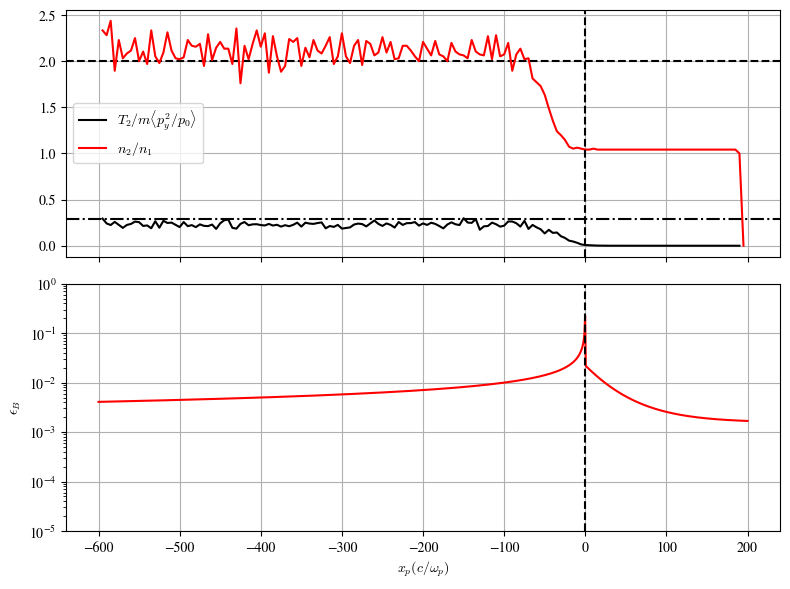

In [192]:
bwinf=-0.99875
Lsh=200
u0 = bwinf/np.sqrt(1-bwinf**2)
xp_e= np.linspace(-600,200,1000); 
i=0; E_b=[]

for item in xp_e:
    uW = 1./6. * ( ( 3. - np.sqrt(3.)/u0 ) + ( 3 + np.sqrt(3.)/u0 ) * np.tanh(2.*xp_e[i]/Lsh)) * u0
    #(5/8 + 3/8 * np.tanh(2*(xp_e[i])/Lsh)) * u0
    #print(uW)
    betaW = uW / np.sqrt(1+pow(uW,2))
    if xp_e[i]< 0:
        E_b.append(0.1/np.sqrt(np.abs(xp_e[i])))
    if xp_e[i] > 0:
        E_b.append(10**3 *(1+1/betaW)**(2)) 
        #print(uW)
    i+=1
    
    if (item== xp_e[1]): 
        print(betaW)
    if (item== xp_e[-1]): 
        print(betaW)


# Create two vertically stacked subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6), height_ratios=[1, 1])

# Plot in the top subplot
ax1.axhline(2, c='k', ls='--')
ax1.axhline(0.29,c='k',ls='-.')
ax1.plot(bins[1:]-600, temp_profile, 'k', label='$T_2/m \\langle p_y^2 / p_0 \\rangle$')
ax1.plot(bins[1:]-600, density_profile/density_profile[-2], 'r', label='$n_2/n_1$')
ax1.legend()
ax1.axvline(x=0, color='black', linestyle='--')  # Vertical line at x=0
ax1.grid(True)

# Plot in the bottom subplot
ax2.plot(xp_e, E_b, color='red')
ax2.set_ylabel('$\\epsilon_B$')
ax2.set_xlabel('$x_p (c/\\omega_p)$')
ax2.axvline(x=0, color='black', linestyle='--')  # Vertical line at x=0
ax2.grid(True)
ax2.set_yscale('log')
ax2.set_ylim(1e-5,1e0)

# Optional: Tight layout for spacing
plt.tight_layout()
plt.show()

In [ ]:
bwinf = -0.99875
Lsh = 50
u0 = bwinf / np.sqrt(1 - bwinf**2)
xp_e = np.linspace(-4000, 6000, 1000)

uW_list = []
betaW_list = []

for xp in xp_e:
    uW = (1./6.) * ((3. - np.sqrt(3.) / u0) + (3. + np.sqrt(3.) / u0) * np.tanh(2. * xp / Lsh)) * u0
    betaW = uW / np.sqrt(1 + uW**2)
    uW_list.append(uW)
    betaW_list.append(betaW)

plt.figure(figsize=(10, 4))
plt.plot(xp_e, uW_list, label=r'$\beta_W$', color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel(r'$x_p (c/\omega_p)$')
plt.ylabel(r'$\beta_W$')
plt.grid(True)
plt.legend()
plt.title("Weibel Frame Velocity β_W vs Position")
plt.show()


In [ ]:
# Generate data
x = np.linspace(-1000, 1000, 500)
y1 = np.sin(x / 100)
y2 = np.log(np.abs(x) + 1)

# Create two vertically stacked subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6), height_ratios=[1, 1])

# Plot in the top subplot
ax1.plot(x, y1, color='blue')
ax1.set_ylabel('sin(x / 100)')
ax1.axvline(x=0, color='black', linestyle='--')  # Vertical line at x=0
ax1.grid(True)

# Plot in the bottom subplot
ax2.plot(x, y2, color='red')
ax2.set_ylabel('log(|x| + 1)')
ax2.set_xlabel('x')
ax2.axvline(x=0, color='black', linestyle='--')  # Vertical line at x=0
ax2.grid(True)

# Optional: Tight layout for spacing
plt.tight_layout()
plt.show()


In [ ]:
omega_pi=1
E_B=1/100
g_sh=20
pW=np.logspace(-2,4,100)
m=1


# Compute reference momentum p0
p_0w= 1 * (g_sh-1)**0.5 * E_B**0.5 * 10 


betaW = p_0w/m *(1+(p_0w/m)**2)**(-0.5)
gammaW = (1+(p_0w/m)**2)**(0.5)
nu_n1 = 2 * np.pi * E_B**0.5 * (gammaW / (np.sqrt(g_sh - 1)))**(-1) * omega_pi

betaW = p_0w/m *(1+(p_0w/m)**2)**(-0.5)
nu_n2 = 10 * E_B * (p_0w / (np.sqrt(g_sh - 1)))**(-2) * omega_pi * betaW
cst=(nu_n1+nu_n2)/2

tr=[];untr=[]
i=0; 
for item in pW:
    betaW = pW[i]/m *(1+(pW[i]/m)**2)**(-0.5)
    gammaW = (1+(pW[i]/m)**2)**(0.5)
    nu_n = 2 * np.pi * E_B**0.5 * (gammaW / (np.sqrt(g_sh - 1)))**(-1) * omega_pi * cst/nu_n1
    tr.append(nu_n)
    i+=1

i=0
for item in pW:
    betaW = pW[i]/m *(1+(pW[i]/m)**2)**(-0.5)
    nu_n = 10 * E_B * (pW[i] / (np.sqrt(g_sh - 1)))**(-2) * omega_pi * betaW * cst/nu_n2
    untr.append(nu_n)
    i+=1

print(nu_n1, nu_n2, cst)

In [ ]:
plt.plot(pW, tr, label='trap')
plt.plot(pW, untr, label='untrap')
plt.axvline(p_0w,c='k',ls='-.')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.show()

# Comparative Study 

### For $\nu$ ranging between [1, 0.1, 0.01, 0.001]

In [ ]:
# Define the folder containing the data files
folder_path = "/home/kartav/scratch/ppc_20/"

# Find all relevant files (matching the given pattern)
files = glob.glob(os.path.join(folder_path, "proc_*_spec_2_*_nu_*.dat"))

# Dictionary to store merged data for each nu
nu_data = {}

# Process each unique nu value
for nu in range(5):  # Assuming nu ranges from 0 to 4
    proc_0_file = next((f for f in files if f"proc_0_spec_2_" in f and f"_nu_{nu}.dat" in f), None)
    proc_1_file = next((f for f in files if f"proc_1_spec_2_" in f and f"_nu_{nu}.dat" in f), None)
    print(nu)

    if proc_0_file and proc_1_file:
        # Read both files (skip first 2 rows, assume 18 columns)
        df0 = pd.read_csv(proc_0_file, delimiter=r'\s+', skiprows=2, header=None)
        df1 = pd.read_csv(proc_1_file, delimiter=r'\s+', skiprows=2, header=None)

        # Check if both files have 18 columns
        if df0.shape[1] != 18 or df1.shape[1] != 18:
            raise ValueError(f"File structure mismatch in nu={nu}. Expected 18 columns.")

        # Rename columns
        column_names = [
            "px", "py", "pz", "x", "y", "omega", 
            "xp", "x_prev", "y_prev", "nu", 
            "px_prev", "py_prev", "pz_prev", "m", 
            "p0", "gamma", "q", "Ex"
        ]
        df0.columns = column_names
        df1.columns = column_names

        # Merge data (concatenate rows)
        df_merged = pd.concat([df0, df1], ignore_index=True)

        # Store in dictionary with key as nu
        nu_data[nu] = df_merged

        print(f"Successfully merged files for nu={nu}")

# Now, you can access the merged data for each nu:
# Example: nu_data[0] will contain the merged dataframe for nu=0


### Reading the data all together for all the different cases

In [ ]:
# Get merged data for different nu's
df_nu0 = nu_data[0]
df_nu1 = nu_data[1]
df_nu2 = nu_data[2]
df_nu3 = nu_data[3]
#df_nu4 = nu_data[4]

# Extract px values for nu=1
px_nu0 = df_nu0["px"].tolist()
py_nu0 = df_nu0["py"].tolist()
xp_nu0 = df_nu0["xp"].tolist()
p0_nu0 = df_nu0["p0"].tolist()

# Extract px values for nu=1
px_nu1 = df_nu1["px"].tolist()
py_nu1 = df_nu1["py"].tolist()
xp_nu1 = df_nu1["xp"].tolist()
p0_nu1 = df_nu1["p0"].tolist()

# Extract px values for nu=1
px_nu2 = df_nu2["px"].tolist()
py_nu2 = df_nu2["py"].tolist()
xp_nu2 = df_nu2["xp"].tolist()
p0_nu2 = df_nu2["p0"].tolist()

# Extract px values for nu=1
px_nu3 = df_nu3["px"].tolist()
py_nu3 = df_nu3["py"].tolist()
xp_nu3 = df_nu3["xp"].tolist()
p0_nu3 = df_nu3["p0"].tolist()

# Extract px values for nu=1
# px_nu4 = df_nu4["px"].tolist()
# py_nu4 = df_nu4["py"].tolist()
# xp_nu4 = df_nu4["xp"].tolist()
# p0_nu4 = df_nu4["p0"].tolist()

# Print first 5 px values
print(px_nu0[:5])
print(px_nu1[:5])
print(px_nu2[:5])
print(px_nu3[:5])
# print(px_nu4[:5])


In [ ]:
# Plotting the P_x Vs X_p plot (in the trubulence frame) to check the intergrity of the collective run
fig, axes = plt.subplots(1, 1, figsize=(12, 10))
#plt.hist2d(xp_nu3, np.sqrt(np.array(px_nu3)**2+np.array(py_nu3)**2), bins=[100,50], norm= LogNorm())
plt.hist2d(xp_nu3, np.array(px_nu3), bins=[100,50], norm= LogNorm())
plt.ylabel("$p_x$")
plt.xlabel('$x_p$')
plt.title('Profile in the turbulence frame for $\\nu=$ 3')
plt.show()

In [ ]:
# Your data
xp_list = [xp_nu0, xp_nu1, xp_nu2, xp_nu3]
px_list = [px_nu0, px_nu1, px_nu2, px_nu3]
nu_values = [1, 0.1, 0.01, 0.00]

fig, axes = plt.subplots(2, 2, figsize=(18, 12), constrained_layout=False)

# Keep a reference to the last hist2d image for the colorbar
hist = None

for i, ax in enumerate(axes.flat):
    hist = ax.hist2d(
        xp_list[i], px_list[i], bins=[100, 50], norm=LogNorm(), cmap="viridis"
    )
    ax.set_xlabel("$x_p (c/\omega_p)$", fontsize=24)
    ax.set_ylabel("$p_x$", fontsize=24)
    ax.set_title(f"$\\nu = {pow(10,-i)} (\omega_p)$", fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=20)

# Manually define position for colorbar: [left, bottom, width, height]
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
cbar = fig.colorbar(hist[3], cax=cbar_ax)
cbar.set_label("Counts", fontsize=22)
cbar.ax.tick_params(labelsize=18)

plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust spacing between plots
plt.show()

### Energy and Temperature plots

In [ ]:
bins = np.arange(0,800,50)
bin_indices = np.digitize(np.array(xp_nu0),bins )

bin_means = [np.array(px_nu0)[bin_indices == i].mean() for i in range(1, len(bins))]

print(bin_means)

#### Temperature Profiles

In [ ]:
Nbin = 1
bins = np.arange(0,800,Nbin)
bin_indices = np.digitize(np.array(xp_nu0),bins )
bin_means = [(np.array(py_nu0)**2/np.array(p0_nu0))[bin_indices == i].mean() for i in range(1, len(bins))]
plt.plot(bins[1::], bin_means,'k', label='$\\nu=1$')

bins = np.arange(0,800,Nbin)
bin_indices = np.digitize(np.array(xp_nu1),bins )
bin_means = [(np.array(py_nu1)**2/np.array(p0_nu1))[bin_indices == i].mean() for i in range(1, len(bins))]
plt.plot(bins[1::], bin_means,'g', label='$\\nu=0.1$')

bins = np.arange(0,800,Nbin)
bin_indices = np.digitize(np.array(xp_nu2),bins )
bin_means = [(np.array(py_nu2)**2/np.array(p0_nu2))[bin_indices == i].mean() for i in range(1, len(bins))]
plt.plot(bins[1::], bin_means,'b', label='$\\nu=0.01$')

bins = np.arange(0,800,Nbin)
bin_indices = np.digitize(np.array(xp_nu3),bins )
bin_means = [(np.array(py_nu3)**2/np.array(p0_nu3))[bin_indices == i].mean() for i in range(1, len(bins))]
plt.plot(bins[1::], bin_means,'m', label='$\\nu=0.001$')

plt.legend()
plt.yscale('log')
plt.show()

In [ ]:
print(np.shape(px1_t))
print(px1_t)

#### Profile of the Energy of the downstream particles

In [ ]:
# Define bin size for spatial bins
Nbin = 50  # Bin size for spatial averaging
bins = np.arange(0, 800, Nbin)  # Define spatial bins

# Digitize particle positions into bins
bin_indices = np.digitize(np.array(xp_nu0), bins)

# Define log-spaced energy bins
energy_bins = np.logspace(-4, 1, 20)

# Initialize plot
plt.figure(figsize=(8, 5))

# Loop through spatial bins but only for x_p < 200
for i in range(1, len(bins) - 1):
    if bins[i] >= 600:
        continue  # Skip bins where x_p >= 200

    # Extract particle energies in the given spatial bin
    energy_values = np.sqrt(np.array(px_nu0)[bin_indices == i]**2 + 
                            np.array(py_nu0)[bin_indices == i]**2)
    
    # Plot solid histogram for particles in this spatial bin
    plt.hist(energy_values, bins=energy_bins, alpha=0.6, label=f"$x_p$ {bins[i]:.0f}-{bins[i+1]:.0f}")

# Log scale for better visualization
plt.xscale('log')
#plt.yscale('log')

# Labels and formatting
plt.xlabel('Particle Energy $E$', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Energy Distribution', fontsize=16)
plt.legend(loc='best', fontsize=10)
plt.grid()

plt.show()


In [ ]:
print(np.shape(xp_nu1))

In [ ]:
# Define bin settings
%matplotlib widget
import matplotlib.cm as cm

energy_bins = np.logspace(-2, 1, 100)  # Log-spaced energy bins
spatial_bins = np.arange(0, 800, 100)  # Spatial bins
cmap = cm.get_cmap('jet',len(spatial_bins))
# List of cases with corresponding labels and colors
cases = [(xp_nu0, px_nu0, py_nu0, 'k', r'$\nu=1$'),
         (xp_nu1, px_nu1, py_nu1, 'g', r'$\nu=0.1$'),
         (xp_nu2, px_nu2, py_nu2, 'b', r'$\nu=0.01$'),
         (xp_nu3, px_nu3, py_nu3, 'm', r'$\nu=0.001$')]

# Create figure and subplots
hmt = 0.8
fig, axes = plt.subplots(2, 2, figsize=(12*hmt, 10*hmt))
axes = axes.flatten()  # Flatten for easier iteration

# Loop over the four cases and create histograms
for i, (xp, px, py, color, label) in enumerate(cases):
    ax = axes[i]
    
    # Digitize xp into spatial bins
    bin_indices = np.digitize(np.array(xp), spatial_bins)

    # Loop over spatial bins but only for x_p < 200
    for j in range(1, len(spatial_bins) - 1):
        #if spatial_bins[j] >= 100000:
        #    continue  # Skip bins where x_p >= 200

        # Compute particle energy
        energy_values = np.sqrt(np.array(px)[bin_indices == j]**2 + 
                                np.array(py)[bin_indices == j]**2)
        
        # Plot histogram
        ax.hist(energy_values, histtype='step', bins=energy_bins, alpha=1, color=cmap(j), label=f"$x_p$ {spatial_bins[j]:.0f}-{spatial_bins[j+1]:.0f}")

    # Set log scales
    ax.set_xscale('log')
    ax.set_yscale('log')

    # Formatting
    ax.set_xlabel(r'$p\,[m_{\rm e}]$', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'Energy Distribution {label}', fontsize=14)
    #ax.legend(loc='best', fontsize=10)
    #ax.set_ylim([1e-2,1e1])
    ax.grid()

# Adjust layout
plt.tight_layout()
plt.show()


#### Bulk Velocity Profile

In [ ]:
# Define bin size
Nbin = 50  # Bin size for averaging
bins = np.arange(0, 800, Nbin)

# Digitize particle positions into bins
bin_indices = np.digitize(np.array(xp_nu0), bins)

# Compute Bulk Velocity Profile <1/sqrt(1 - beta^2)> where beta = p_x / p_0 
# (beta_{sh|w})=\frac{U_{sh|w}}{\gamma_{sh|w}}
beta = np.array(px_nu0) / np.array(p0_nu0)
bulk_velocity = [(1 / np.sqrt(1 - beta[bin_indices == i]**2)).mean() 
                 for i in range(1, len(bins))]


# Plot Bulk Velocity Profile
plt.figure(figsize=(8, 5))
plt.plot(bins[1:], bulk_velocity, 'b')
plt.xlabel('$x_p$', fontsize=14)
plt.ylabel('Bulk Velocity $\\langle 1/\\sqrt{1 - \\beta^2} \\rangle$', fontsize=14)
plt.title('Bulk Velocity Profile vs $x_p$', fontsize=16)
plt.grid()
plt.show()

In [ ]:
hmt = 0.8
fig, axes = plt.subplots(1, 1, figsize=(12*hmt, 10*hmt))

# Define bin size
Nbin = 50  # Bin size for averaging

# Digitization of nu = 1
bin_indices = np.digitize(np.array(xp_nu0), bins)
bins = np.arange(0,800,Nbin)
beta_0 = np.array(px_nu0) / np.array(p0_nu0)
bulk_velocity_0 = [((beta_0 / np.sqrt(1 - beta_0**2))[bin_indices == i]).mean() 
                 for i in range(1, len(bins))]
plt.plot(bins[1:], bulk_velocity_0, 'k')

# Digitization of nu = 0.1
bin_indices = np.digitize(np.array(xp_nu1), bins)
bins = np.arange(0,800,Nbin)
beta_1 = np.array(px_nu1) / np.array(p0_nu1)
bulk_velocity_1 = [((beta_1 / np.sqrt(1 - beta_1**2))[bin_indices == i]).mean() 
                 for i in range(1, len(bins))]
plt.plot(bins[1:], bulk_velocity_1, 'g')

# Digitization of nu = 0.01
bin_indices = np.digitize(np.array(xp_nu2), bins)
bins = np.arange(0,800,Nbin)
beta_2 = np.array(px_nu2) / np.array(p0_nu2)
bulk_velocity_2 = [((beta_2 / np.sqrt(1 - beta_2**2))[bin_indices == i]).mean() 
                 for i in range(1, len(bins))]
plt.plot(bins[1:], bulk_velocity_2, 'b')

# Digitization of nu = 0.001
bin_indices = np.digitize(np.array(xp_nu3), bins)
bins = np.arange(0,800,Nbin)
beta_3 = np.array(px_nu3) / np.array(p0_nu3)
bulk_velocity_3 = [((beta_3 / np.sqrt(1 - beta_3**2))[bin_indices == i]).mean() 
                 for i in range(1, len(bins))]
plt.plot(bins[1:], bulk_velocity_3, 'm')

# Plot Bulk Velocity Profile
#plt.figure(figsize=(8, 5))
#plt.plot(bins[1:], bulk_velocity, 'b')
plt.xlabel('$x_p$', fontsize=14)
plt.ylabel('Bulk Velocity $\\langle 1/\\sqrt{1 - \\beta^2} \\rangle$', fontsize=14)
plt.title('Bulk Velocity Profile vs $x_p$', fontsize=16)
plt.grid()
plt.show()

#### Number Density profile Vs X_p 

In [ ]:
# Define bin size
Nbin = 50  # Bin size for averaging
bins = np.arange(0, 800, Nbin)

# Digitize particle positions into bins
bin_indices = np.digitize(np.array(xp_nu0), bins)

# Compute Density Profile (number of particles per bin)
density_profile = [np.sum(bin_indices == i) for i in range(1, len(bins))]

# Plot Density Profile
plt.figure(figsize=(8, 5))
plt.plot(bins[1:], density_profile, 'r')
plt.xlabel('$x_p$', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Density Profile vs $x_p$', fontsize=16)
plt.grid()
plt.show()

In [ ]:
# Define bin size
Nbin = 50  # Bin size for averaging
# bins = np.arange(0, 800, Nbin)
# Compute Density Profile (number of particles per bin)
# density_profile = [np.sum(bin_indices == i) for i in range(1, len(bins))]

# Digitize particle positions into bins
bin_indices = np.digitize(np.array(xp_nu0), bins)
bins = np.arange(0, 800, Nbin)
density_profile_0 = [np.sum(bin_indices == i) for i in range(1, len(bins))]
plt.plot(bins[1:], density_profile_0, 'k')

# Digitize particle positions into bins
bin_indices = np.digitize(np.array(xp_nu0), bins)
bins = np.arange(0, 800, Nbin)
density_profile_1 = [np.sum(bin_indices == i) for i in range(1, len(bins))]
plt.plot(bins[1:], density_profile_1, 'g')

# Digitize particle positions into bins
bin_indices = np.digitize(np.array(xp_nu0), bins)
bins = np.arange(0, 800, Nbin)
density_profile_2 = [np.sum(bin_indices == i) for i in range(1, len(bins))]
plt.plot(bins[1:], density_profile_2, 'b')

# Digitize particle positions into bins
bin_indices = np.digitize(np.array(xp_nu0), bins)
bins = np.arange(0, 800, Nbin)
density_profile_3 = [np.sum(bin_indices == i) for i in range(1, len(bins))]
plt.plot(bins[1:], density_profile_3, 'm')

# Plot Density Profile
plt.xlabel('$x_p$', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Density Profile vs $x_p$', fontsize=16)
plt.grid()


In [ ]:
# Define bin size
Nbin = 10  # Bin size for averaging
bins = np.arange(0, 800, Nbin)

# Digitize particle positions into bins
bin_indices = np.digitize(np.array(xp_nu0), bins)

# Compute Temperature Profile <p_y^2 / p_0>
temp_profile = [(np.array(py_nu0)**2 / np.array(p0_nu0))[bin_indices == i].mean() 
                for i in range(1, len(bins))]

# Compute Density Profile (number of particles per bin)
density_profile = [np.sum(bin_indices == i) for i in range(1, len(bins))]

# Compute Bulk Velocity Profile <1/sqrt(1 - beta^2)> where beta = p_x / p_0 
# (beta_{sh|w})=\frac{U_{sh|w}}{\gamma_{sh|w}}
beta = np.array(px_nu0) / np.array(p0_nu0)
bulk_velocity = [(1 / np.sqrt(1 - beta[bin_indices == i]**2)).mean() 
                 for i in range(1, len(bins))]

# Compute Downstream Particle Energy Profile <E = sqrt(p_x^2 + p_y^2)>
particle_energy = [np.sqrt(np.array(px_nu0)[bin_indices == i]**2 + 
                           np.array(py_nu0)[bin_indices == i]**2).mean() 
                   for i in range(1, len(bins))]

# Plot Temperature Profile
plt.figure(figsize=(8, 5))
plt.plot(bins[1:], temp_profile, 'k')
plt.xlabel('$x_p$', fontsize=14)
plt.ylabel('Temperature $\\langle p_y^2 / p_0 \\rangle$', fontsize=14)
plt.title('Temperature Profile vs $x_p$', fontsize=16)
plt.grid()
plt.show()

# Plot Density Profile
plt.figure(figsize=(8, 5))
plt.plot(bins[1:], density_profile, 'r')
plt.xlabel('$x_p$', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Density Profile vs $x_p$', fontsize=16)
plt.grid()
plt.show()

# Plot Bulk Velocity Profile
plt.figure(figsize=(8, 5))
plt.plot(bins[1:], bulk_velocity, 'b')
plt.xlabel('$x_p$', fontsize=14)
plt.ylabel('Bulk Velocity $\\langle 1/\\sqrt{1 - \\beta^2} \\rangle$', fontsize=14)
plt.title('Bulk Velocity Profile vs $x_p$', fontsize=16)
plt.grid()
plt.show()

# Plot Particle Energy Profile
plt.figure(figsize=(8, 5))
plt.plot(bins[1:], particle_energy, 'g')
plt.xlabel('$x_p$', fontsize=14)
plt.ylabel('Particle Energy $\\langle E \\rangle$', fontsize=14)
plt.title('Downstream Particle Energy Profile vs $x_p$', fontsize=16)
plt.grid()
plt.show()


In [ ]:
# Setup
Nbin = 5
bins = np.arange(0, 800, Nbin)
nu_list = [1, 0.1, 0.01, 0.001]
xp_list = [xp_nu0, xp_nu1, xp_nu2, xp_nu3]
px_list = [px_nu0, px_nu1, px_nu2, px_nu3]
py_list = [py_nu0, py_nu1, py_nu2, py_nu3]
p0_list = [p0_nu0, p0_nu1, p0_nu2, p0_nu3]
colors = ['black', 'green', 'blue', 'red']

# Containers for profiles
temp_profiles = []
density_profiles = []
bulk_vel_profiles = []
energy_profiles = []

# Compute all profiles
for xp, px, py, p0 in zip(xp_list, px_list, py_list, p0_list):
    bin_indices = np.digitize(np.array(xp), bins)

    # Temperature
    temp = [
        (np.array(py)**2 / np.array(p0))[bin_indices == i].mean()
        if np.any(bin_indices == i) else np.nan
        for i in range(1, len(bins))
    ]
    temp_profiles.append(temp)

    # Density
    density = [np.sum(bin_indices == i) for i in range(1, len(bins))]
    density_profiles.append(density/density[-1])

    # Bulk Velocity
    beta = np.array(px) / np.array(p0)
    bulk = [
        (1 / np.sqrt(1 - beta[bin_indices == i]**2)).mean()
        if np.any(bin_indices == i) else np.nan
        for i in range(1, len(bins))
    ]
    bulk_vel_profiles.append(bulk)

    # Energy
    energy = [
        np.sqrt(np.array(px)[bin_indices == i]**2 + np.array(py)[bin_indices == i]**2).mean()
        if np.any(bin_indices == i) else np.nan
        for i in range(1, len(bins))
    ]
    energy_profiles.append(energy)

# Function to plot
def plot_profiles(bins, profiles, ylabel, title, colors, nu_list):
    plt.figure(figsize=(10, 6))
    for profile, color, nu in zip(profiles, colors, nu_list):
        plt.plot(bins[1:], profile, label=f"$\\nu={nu}$", color=color)
    plt.xlabel('$x_p (c/\omega_p)$', fontsize=17)
    plt.ylabel(ylabel, fontsize=17)
    plt.title(title, fontsize=20)
    plt.grid(True)
    plt.legend(fontsize=15)
    plt.tight_layout()
    plt.show()
    plt.tick_params(axis='both', which='major', labelsize=15)

# Plot all four
plot_profiles(bins, temp_profiles, 'Temperature $\\langle p_y^2 / p_0 \\rangle$', 'Temperature Profile', colors, nu_list)
plot_profiles(bins, density_profiles, 'Density', 'Density Profiles', colors, nu_list)
plot_profiles(bins, bulk_vel_profiles, 'Bulk Velocity $\\langle 1/\\sqrt{1 - \\beta^2} \\rangle$', 'Bulk Velocity Profile', colors, nu_list)
plot_profiles(bins, energy_profiles, 'Particle Energy $\\langle E \\rangle$', 'Downstream Particle Energy Profile', colors, nu_list)
